<a href="https://colab.research.google.com/github/MsSaidat25/Labs-Data-Mining/blob/main/LabClusterEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score

#Dataset creation with sklearn tools (make_blobs)

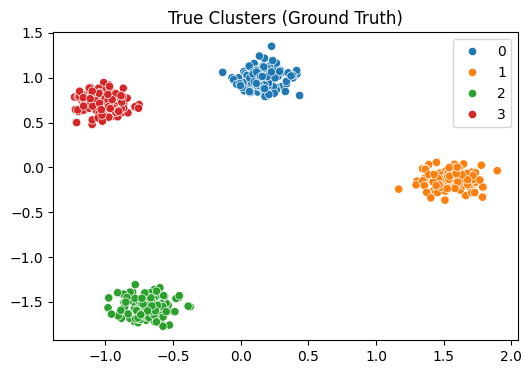

In [36]:
# Create blob-like data with clear clusters. Please note that these are perfect clusters with create.
#So, the clustering structure will be obvious to the algorithms

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the true clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_true, palette='tab10')
plt.title("True Clusters (Ground Truth)")
plt.show()

#Using elbow method to determine the number of cluster

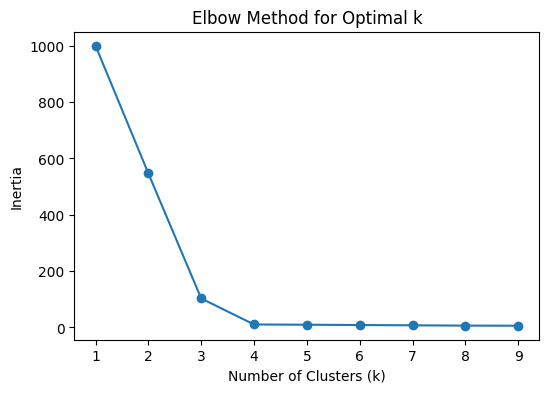

In [37]:
inertia = [] #Inertia is the sum of squared distances from each point to its assigned cluster center.
#inertia is a metric that measures how internally coherent the clusters are


K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#Apply both k-means and DBScan on the same data. Please note that DBSCAN doesn't require the number of clusters, but it asks epsilon and min_samples (min points)

In [38]:
# Best guess from elbow method (should be 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN (tune these for best results)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

#Let's visualize both clustering outputs

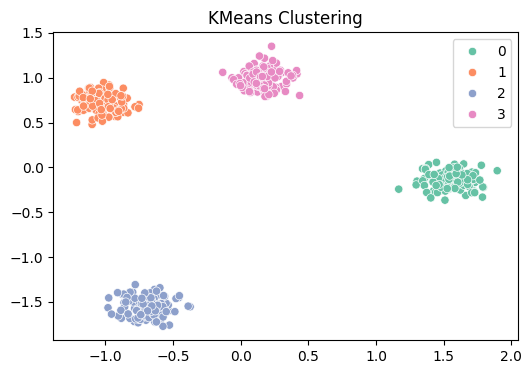

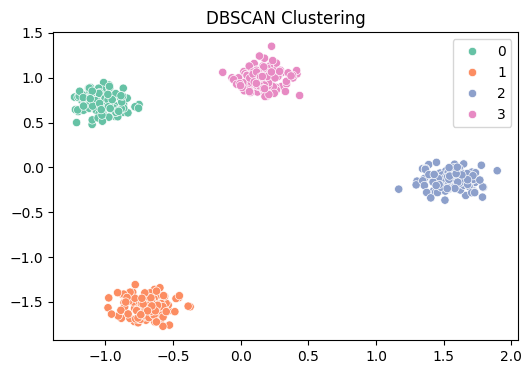

In [39]:
# Visualize KMeans
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("KMeans Clustering")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()

#Adjusted Rand Index calculations

In [40]:
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)

print("Adjusted Rand Index (KMeans):", ari_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_dbscan)

Adjusted Rand Index (KMeans): 1.0
Adjusted Rand Index (DBSCAN): 1.0


#Can you do the same experiment with iris data?

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Prepare Iris Data




In [42]:
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = pd.Series(iris.target)

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)


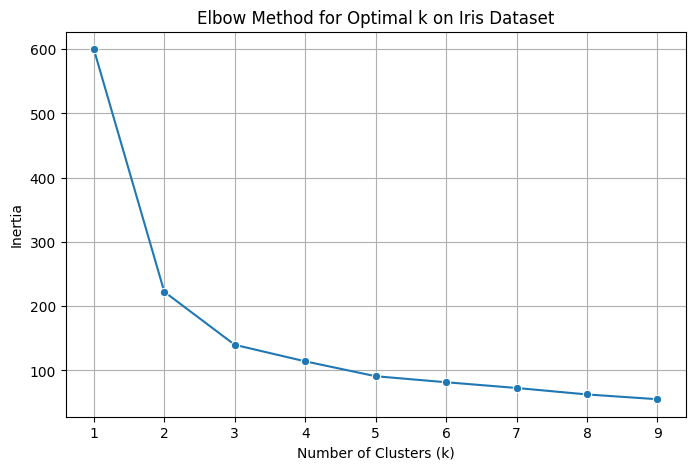

In [43]:
inertia_iris = []
K_range_iris = range(1, 10)

for k in K_range_iris:
    kmeans_iris = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_iris.fit(X_iris_scaled)
    inertia_iris.append(kmeans_iris.inertia_)

#Plot the elbow curve
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(K_range_iris), y=inertia_iris, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k on Iris Dataset')
plt.grid(True)
plt.show()

In [44]:
kmeans_iris = KMeans(n_clusters=4, random_state=42,)
kmeans_iris_labels = kmeans_iris.fit_predict(X_iris_scaled)

# Apply DBSCAN clustering
dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
dbscan_iris_labels = dbscan_iris.fit_predict(X_iris_scaled)



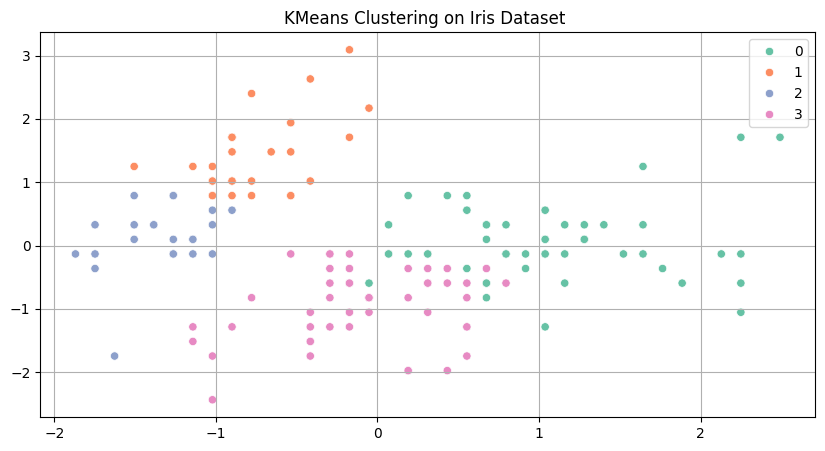

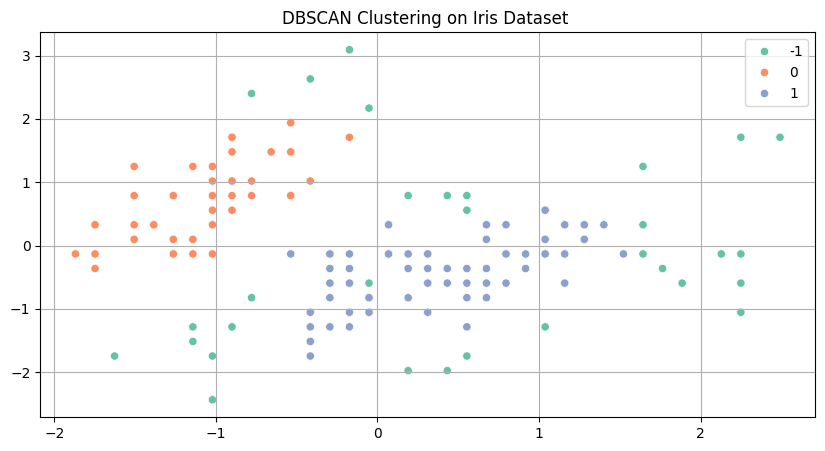

In [45]:
# Visualize KMeans Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_iris_scaled[:, 0], y=X_iris_scaled[:, 1], hue=kmeans_iris_labels, palette='Set2', legend='full')
plt.title('KMeans Clustering on Iris Dataset ')
plt.grid(True)
plt.show()

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_iris_scaled[:, 0], y=X_iris_scaled[:, 1], hue=dbscan_iris_labels, palette='Set2', legend='full')
plt.title('DBSCAN Clustering on Iris Dataset ')
plt.grid(True)
plt.show()

In [46]:
ari_kmeans_iris = adjusted_rand_score(y_iris, kmeans_iris_labels)
ari_dbscan_iris = adjusted_rand_score(y_iris, dbscan_iris_labels)

print("Adjusted Rand Index (KMeans):", ari_kmeans_iris)
print("Adjusted Rand Index (DBSCAN):", ari_dbscan_iris)

Adjusted Rand Index (KMeans): 0.4945348085299907
Adjusted Rand Index (DBSCAN): 0.4420986685885924
